In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load your data
df = pd.read_csv('data/trial_summaries/summary_xlnet-large-cased_2024-04-18 16%3A02%3A07.146342.csv')

# Show the dataframe to understand its structure
print(df.head())


   number     value              datetime_start           datetime_complete  \
0       0  0.573468  2024-04-18 13:38:17.792548  2024-04-18 13:45:16.947390   
1       1  0.591775  2024-04-18 13:45:16.947900  2024-04-18 13:49:17.720794   
2       2  0.591005  2024-04-18 13:49:17.721605  2024-04-18 13:51:42.781746   
3       3  0.579601  2024-04-18 13:51:42.782602  2024-04-18 13:53:21.427391   
4       4  0.603231  2024-04-18 13:53:21.428244  2024-04-18 13:55:03.802736   

                 duration  params_batch_size  params_learning_rate  \
0  0 days 00:06:59.154842                 48              0.000018   
1  0 days 00:04:00.772894                 32              0.000003   
2  0 days 00:02:25.060141                 48              0.000003   
3  0 days 00:01:38.644789                 16              0.000167   
4  0 days 00:01:42.374492                 32              0.000003   

   params_weight_decay     state  
0             0.020347  COMPLETE  
1             0.019972  COMPLETE  

In [7]:
# Identify columns that start with 'params_'
param_columns = [col for col in df.columns if col.startswith('params_')]

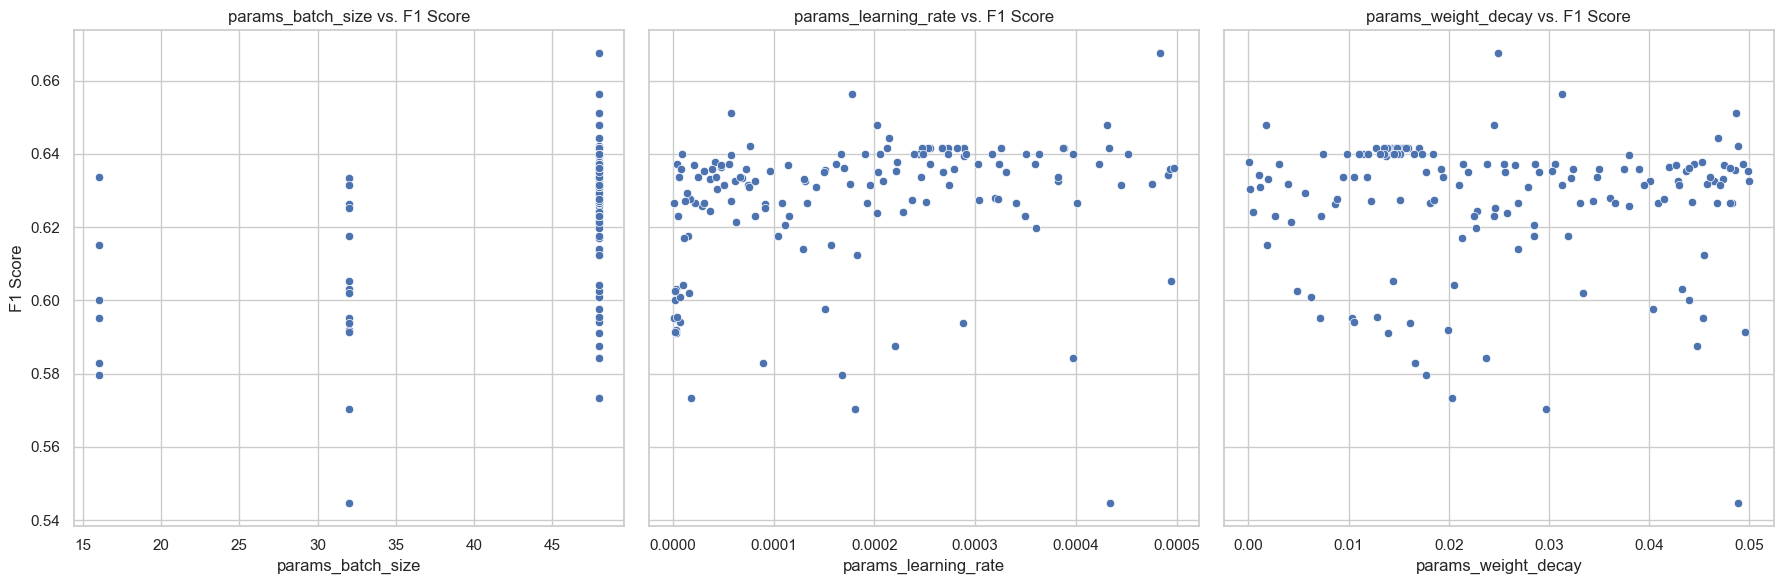

In [8]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Number of parameter columns
num_params = len(param_columns)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=num_params, figsize=(6 * num_params, 6), sharey=True)

# Flatten axes array if more than one plot
if num_params > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot each parameter against the F1 score
for ax, param in zip(axes, param_columns):
    sns.scatterplot(data=df, x=param, y='value', ax=ax)
    ax.set_title(f'{param} vs. F1 Score')
    ax.set_xlabel(param)
    ax.set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


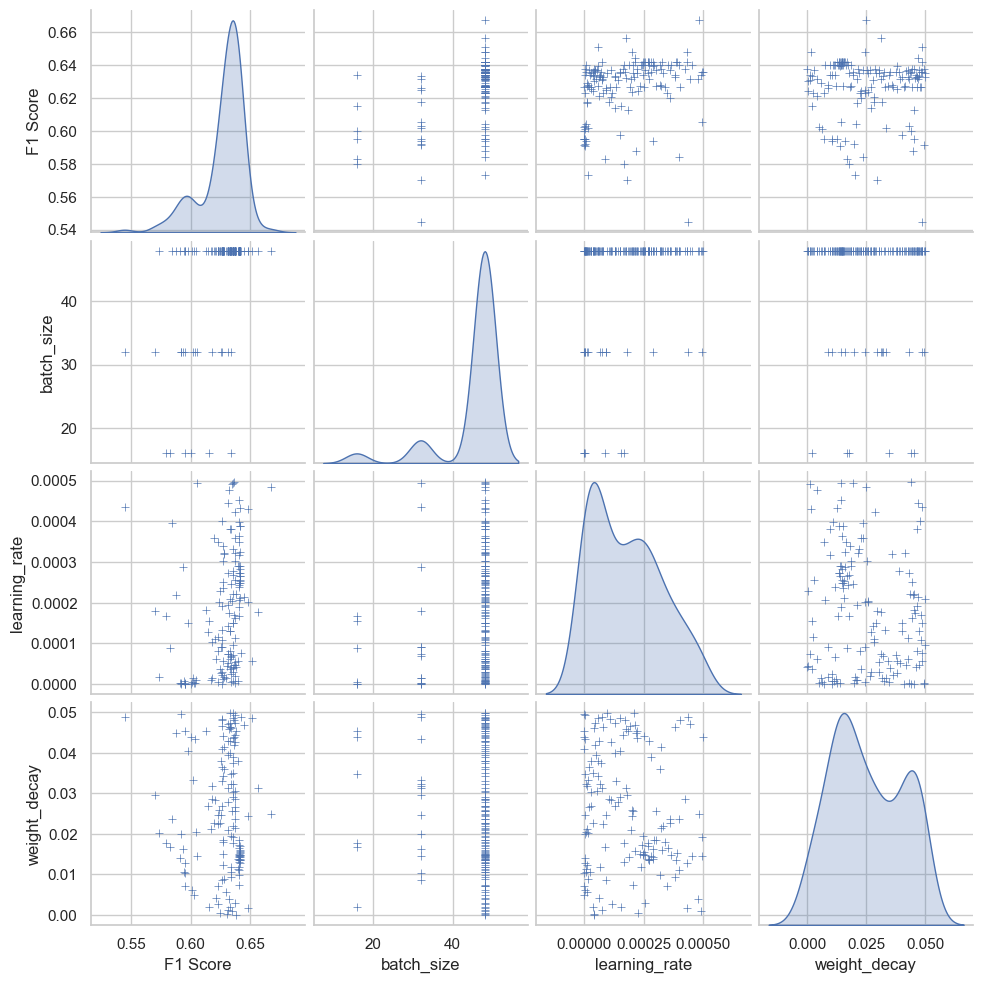

In [9]:
# Prepare data for pair plot
pair_plot_df = df[['value'] + param_columns]
pair_plot_df.columns = ['F1 Score'] + [col.replace('params_', '') for col in param_columns]

# Create a pair plot
sns.pairplot(pair_plot_df, kind='scatter', diag_kind='kde', markers='+')
plt.show()
